In [1]:
#importing libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# getting the page and preapring the soup
url = 'https://editorial.rottentomatoes.com/guide/best-movies-of-all-time/'
page = urlopen(url).read()
soup = BeautifulSoup(page)

# the page has 3 tables each with 100 rows we will get all 300 movies
tables = soup.find_all('table')
movies = []
for table in tables:
    movieRows = table.find_all('tr')
    for row in movieRows:
        movie = row.find_all('td')[1]
        movies.append(movie)
        
len(movies)


300

In [3]:
# getting a single movie by it's rank in the list
def get_movie_by_rank(rank):
    rank = rank - 1
    title = movies[rank].a.text.strip()
    year = movies[rank].find('span',{'class':'year'}).text.strip()
    year= int(year[1:5]) # to remove the brackets and convert to int
    rating = movies[rank].strong.text.strip()
    link= movies[rank].a['href']
    return {'Title':title, 'Year':year, 'Rating':rating, 'Link':link}


In [11]:
# getting all movies and saving them to a csv file
def get_all_movies():
    path = 'F:/Programming Languages/Python/myth_lab/DS-METHODOLOGY-TASKS/Scrapping/rottenTomatoes.csv'
    with open(path, 'w') as file:
        fieldnames = ['Title', 'Year', 'Rating',  'Link']
        writer = csv.DictWriter(file, fieldnames)
        writer.writeheader()
        for i in range(len(movies)):
            movie = get_movie_by_rank(i+1)
            writer.writerow(movie)
        print('Done')

In [12]:
get_all_movies()

Done


In [6]:
#as a bonus i will read the csv file and make a bar plot of the best decade in movies
movies_df = pd.read_csv('F:/Programming Languages/Python/myth_lab/rottenTomatoes.csv',
                        encoding='latin1')# the encoding is needed for the special characters
movies_df.head()

,Title,Year,Rating,Link
0,L.A. Confidential,1997,99%,https://www.rottentomatoes.com/m/la_confidential
1,The Godfather,1972,97%,https://www.rottentomatoes.com/m/the_godfather
2,Casablanca,1942,99%,https://www.rottentomatoes.com/m/1003707-casab...
3,Seven Samurai,1954,100%,https://www.rottentomatoes.com/m/seven_samurai...
4,Parasite,2019,99%,https://www.rottentomatoes.com/m/parasite_2019


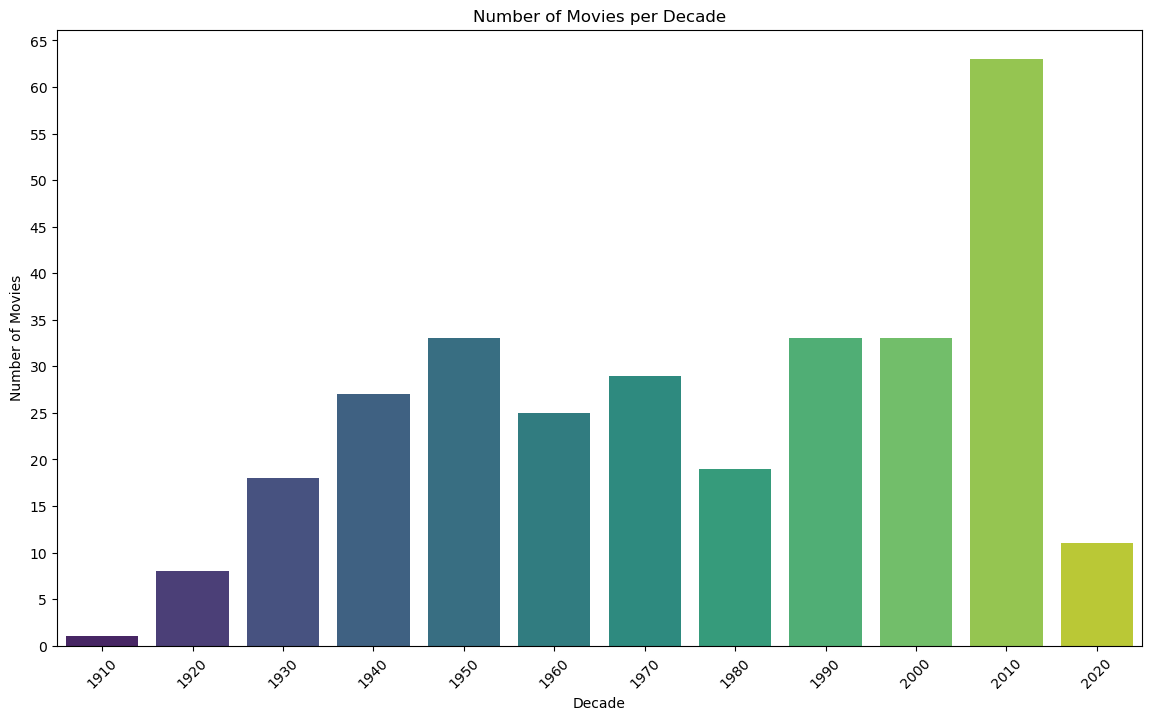

In [7]:
# Create a new column for the 10-year intervals
movies_df['Year Interval'] = (movies_df['Year'] // 10) * 10

# Group by the 10-year intervals and count the number of movies in each interval
year_counts = movies_df['Year Interval'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

plt.title('Number of Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.yticks(range(0, 70, 5))

plt.show()